<a href="https://colab.research.google.com/github/vidyassankar/Machine-learning/blob/Titanic/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



*   List item
*   List item



## **> TITANIC SURVIVAL PREDICTION**

RMS Titanic was a British passenger liner operated by the White Star Line that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after striking an iceberg during her maiden voyage from Southampton to New York City. Of the estimated 2,224 passengers and crew aboard, more than 1,500 died, making the sinking one of modern history's deadliest peacetime commercial marine disasters.

Although Titanic had advanced safety features, such as watertight compartments and remotely activated watertight doors, it only carried enough lifeboats for 1,178 people—about half the number on board, and one third of her total capacity—due to the maritime safety regulations of those days.
 

Kaggle has given a data set with information of passengers. Titanic problem in kaggle mainly ask us to find answers for these questions.

1. Whether there were any bias in Saving the people?
2. If yes, what are the features which helped a person to get survived ?
3. Can you create an ML model which predict the the survival chance of a given test data ?
4. How much accuracy can be claimed in prediction?

(reference from wiki)

Importing files from google colab


In [ ]:
from google.colab import files
 


In [ ]:
!pip install kaggle



First import the necessary modules

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



In [ ]:
TR_Data=pd.read_csv("/content/train.csv")
TE_Data=pd.read_csv("/content/test.csv")

Importing API token from Kaggle

In [ ]:
#uploading files
upload = files.upload()

In [ ]:
#Making directory named 'kaggle'
!mkdir ~/.kaggle

In [ ]:
#Copying kaggle API token to kaggle directory
!cp kaggle.json ~/.kaggle

In [ ]:
#Changing permission of kaggle directory
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions list

In [ ]:
#Downloading Titanic dataset
#!kaggle datasets download -d mlg-ulb/titanic
!kaggle competitions download -c titanic


In [ ]:
!ls

# **Understanding Data and Identifying the variables**

In [ ]:
#Loading the data file (training set)
TR_Data=pd.read_csv('train.csv')

#Displaying the first few lines of training set

TR_Data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#Loading the test data
TE_Data=pd.read_csv('test.csv')
TE_Data.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


The data has two part:

1. Train data :- This data is used to create a ML model . Model should be created based on the insights we get from Exploratory data analysis.In train data set , we give the out come or target variable is known, in this case , we know the details of Survived or not

2. Test data:- Thsi data is used to test how accurate the model performs . Test data do not consist of target variable. For each passenger in the test set we should be able to predict , whether he/she was survived or not.

Lets understand the features....

In [ ]:
#Size of data ie row x cloumn
TR_Data.size

10692

In [ ]:
#Shape of data which is the number of rows and columns
TR_Data.shape

(891, 12)

In [ ]:
#Dimension of the array/data
TR_Data.ndim

2

In [ ]:
# Decribe function is used to view some basic statistical details like percentile, mean, std etc.
TR_Data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#Displays the data types of each features or x variables
TR_Data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## **Identifying the missing value**

Identifying the missing value  and imputing it with most apropriate value is a crucial part of EDA , as negligence in this can impact Model creation and there by leading to wrong prediction.

In [ ]:
#checking the missing Value
TR_Data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
def missingdata(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    ms=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    ms= ms[ms["Percent"] > 0]
    f,ax =plt.subplots(figsize=(8,6))
    plt.xticks(rotation='90')
    fig=sns.barplot(ms.index, ms["Percent"],color="blue",alpha=0.8)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percentage of missing values', fontsize=15)
    plt.title('Percentage of missing data by feature', fontsize=15)
    return ms

,Total,Percent
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467


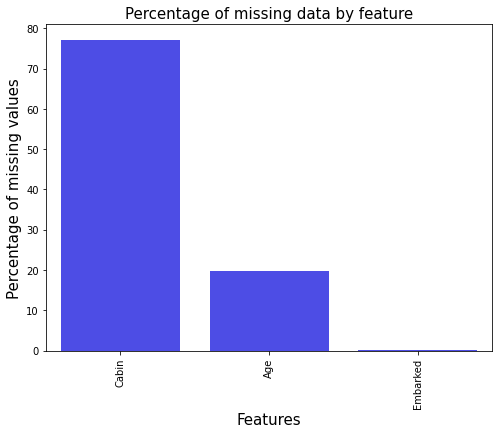

In [ ]:
missingdata(TR_Data)

,Total,Percent
Cabin,327,78.229665
Age,86,20.574163
Fare,1,0.239234


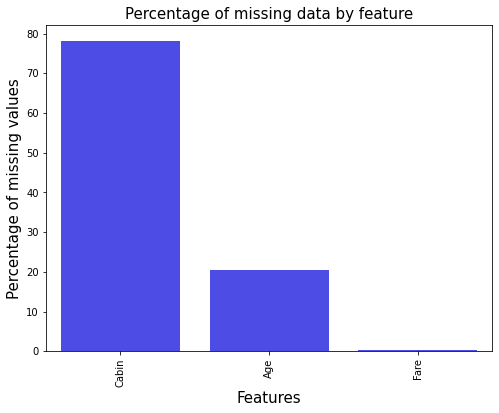

In [ ]:
missingdata(TE_Data)

Inference from above graph

1. Train and test set has almost similar % missing data in all the features
3. Percentage of Missing data in Cabin is around 77 % , which is > 75 % hence , we can exculde the Cabin column in further analysis.
4. Age column has 20% of  missing data , which need to be imputed using appropriate imputation techniques.

In [ ]:
# Droping the entire Cabin column from Train Data
TR_Data.drop(['Cabin'], axis=1 , inplace= True)

In [ ]:
#Droping the entire Cabin column from Test data
TE_data_New=TE_Data.drop(['Cabin'], axis=1 , inplace= True)

Similarly we can drop Passenger ID column as it has no relevence to survival chance.

In [ ]:
#Droping entire passenger ID column from Train data set
TR_Data.drop(['PassengerId'], axis=1 , inplace= True)

In [ ]:
#Droping entire passenger ID column from Test data set
TE_Data.drop(['PassengerId'], axis=1 , inplace= True)

Next we need to impute the missing value in Age feature . There are different method by which missing value can be replaced which are given below.

1. Replacing with random values
2. Replacing  with statistical methods
3. create a model to predict the missing value

We are going to choose the second method as the first method is not apt for the age feature and third is expensive.

In Statistical method , we can use mean , median or mode value. Selecting one among this again depends up on the presence of outliers and number of duplicate rows.

Frist we can check if there is any duplicate row present in data set.

In [ ]:
 TR_Data.duplicated(subset=['Name','Ticket','Pclass', 'Age']).any()

False

No duplicate rows found.

Next we have to look for outliers.

In [ ]:
# Sorting the Age value in ascending order

TR_Data.Age.sort_values()

803    0.42
755    0.67
644    0.75
469    0.75
78     0.83
       ... 
859     NaN
863     NaN
868     NaN
878     NaN
888     NaN
Name: Age, Length: 891, dtype: float64

In [ ]:
#finding quantile value

quantile_1, quantile_3 = np.nanpercentile(TR_Data.Age, [25, 75])
print(quantile_1, quantile_3)

20.125 38.0


In [ ]:
#Finding the iqr value
iqr=quantile_3 - quantile_1
print(iqr)

17.875


In [ ]:
# finding the upper and lower bound value
upper_bound = quantile_3 + (1.5 * iqr)
lower_bound = quantile_1 -(1.5 * iqr)

print(upper_bound , lower_bound)

64.8125 -6.6875


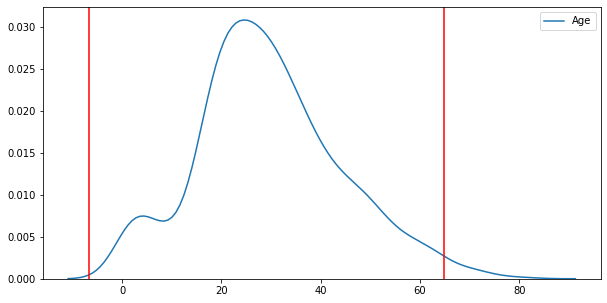

In [ ]:
plt.figure(figsize = (10, 5))
sns.kdeplot(TR_Data.Age)
plt.axvline(x=-6.6875, color = 'red')
plt.axvline(x=64.8125, color = 'red')

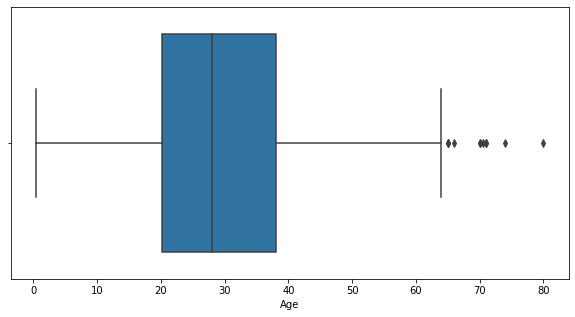

In [ ]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = TR_Data.Age)


From above two graphs , we can see that the outliers does exist in upper bound . So taking mean can cause positive skewing on the bell curve. So in this scenerio it is appropriate to impute the missing value in Age column by median.

In [ ]:
#Replacing the missing value by median 
TR_Data['Age']=TR_Data['Age'].fillna(TR_Data['Age'].median())

In [ ]:
#Replacing missing values in Embarked feature with mode as it is catagorical variable
TR_Data['Embarked'].fillna(TR_Data['Embarked'].mode()[0], inplace = True)

In [ ]:
#Imputing missing values of Age in test data with median
TE_Data['Age'].fillna(TE_Data['Age'].median(), inplace = True)

In [ ]:
# Imputing Test Data feature , Fare with median as there is only one value  missing 
TE_Data['Fare'].fillna(TE_Data['Fare'].median(), inplace = True)


In [ ]:
#Checking the missing value again in Train and Test data
TR_Data.isnull().sum()


Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [ ]:
TE_Data.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

With above Step we have Completed missing value imputations .
Now our data set is perfect without any missing value.

Lets find out the number and percentage of people who survived.

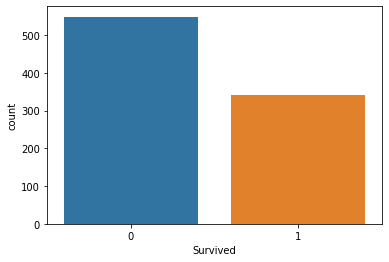

In [ ]:
# Finding out how many people survived and how many not
plt.figure(figsize=(6,4))
sns.countplot(x = 'Survived' , data = TR_Data)


From the above Graph, we can infer that the survival rate is very less. Lets find out if there is any feature which contributes to survival chance.

For this Iam going to consider some of the relevant features with can ppotentially influence the survival rates and do teh visualisation of those features.



Lets find out the percentage of people who survived

In [ ]:
print(TR_Data.Survived.sum()/TR_Data.Survived.count())

0.3838383838383838


Only 38 % of the people survived and it is very less compared to other ship accidents and can count as one of the biggest accidents in the history.

As I stated in the introduction this notorious disaster has caused wide spread outrage over many factors especially unequal treatment of passengers. 

So it is important to find if there are any feature which increased survival chance

Lets do the analysis of feature one by one.

First lets look at the Gender and survival chance.

In [ ]:
#Finding relation between Sex and survival rate
TR_Data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

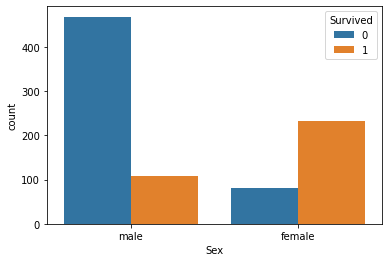

In [ ]:
#Visualizing the graph for Sex Vs Survived
sns.countplot('Sex', hue='Survived', data=TR_Data)


In [ ]:
#Percentage of men and women Survived
print("% of women Survived:", TR_Data[TR_Data.Sex == 'female'].Survived.sum()/TR_Data[TR_Data.Sex =='female'].Survived.count())
print("% of men survived :", TR_Data[TR_Data.Sex == 'male'].Survived.sum()/TR_Data[TR_Data.Sex =='male'].Survived.count())


% of women Survived: 0.7420382165605095
% of men survived : 0.18890814558058924


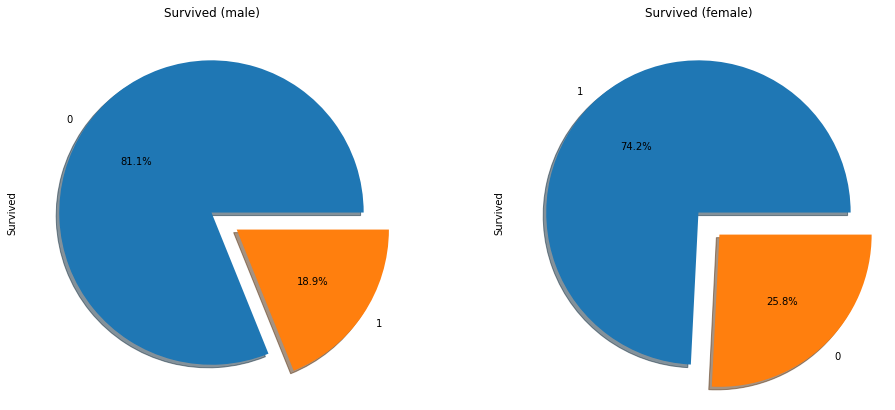

In [ ]:
#Plotting graphs of percentage of women and men survived

f,ax=plt.subplots(1,2,figsize=(16,7))
TR_Data['Survived'][TR_Data['Sex']=='male'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True)
TR_Data['Survived'][TR_Data['Sex']=='female'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[0].set_title('Survived (male)')
ax[1].set_title('Survived (female)')

plt.show()

From the above graph it is evident that the Survival chance is more in females. It might be due to women are given preference and considered as vulnarable sections of society.

This evaluation doesnt consider the number of children so we need to find out the number of children and percentage of children in total females to confirm that they really gave preference to Female over male or not.

Now lets find out the number of children

Binning Age into 8 groups

In [ ]:
for df in [TR_Data, TE_Data]:
    df['Age_grp']=np.nan
    for i in range(8,0,-1):
        df.loc[ df['Age'] <= i*10, 'Age_grp'] = i

print(TR_Data[['Age', 'Age_grp']].head(5))

    Age  Age_grp
0  22.0      3.0
1  38.0      4.0
2  26.0      3.0
3  35.0      4.0
4  35.0      4.0


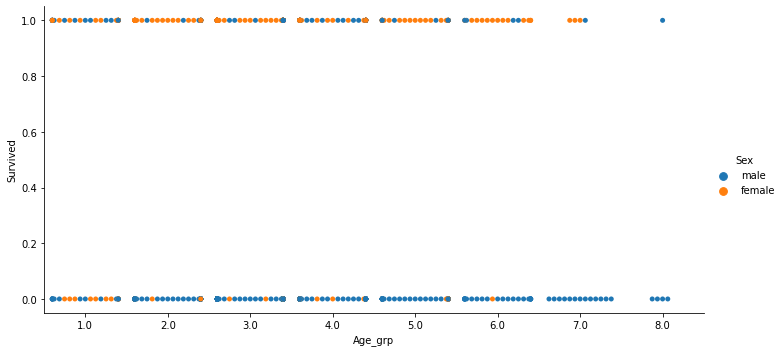

In [ ]:
#plt.figure(figsize=(20,5))
sns.catplot(x="Age_grp",y="Survived" , kind = "swarm",hue="Sex", data=TR_Data, height=5, aspect=2)



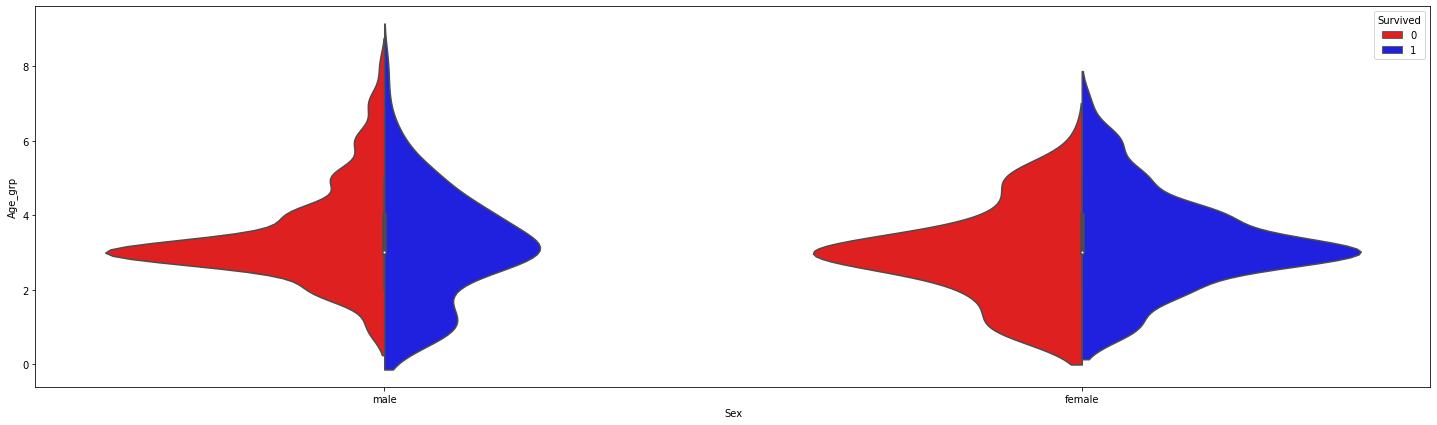

In [ ]:
fig = plt.figure(figsize=(25, 7))
sns.violinplot(x='Sex', y='Age_grp', 
               hue='Survived', data=TR_Data, 
               split=True,
               palette={0: "r", 1: "b"}
              );

Above graph represents the Survived male consist of lot of children , We can conclude that the Survival chance was more for kids and females.

Above count says that there are no duplicate entries in dataset.

Now lets find out the relation between Passenger class and Survival chance

In [ ]:
#Find out the relation between Pclass and Survival chance
TR_Data.groupby(['Pclass','Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

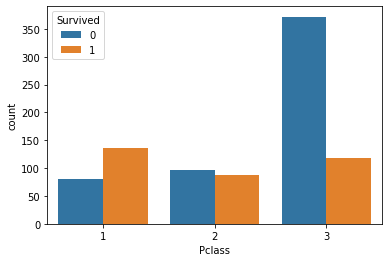

In [ ]:
#Plotting graph of Pclass vs Survived
sns.countplot('Pclass', hue='Survived', data=TR_Data)


In [ ]:
#plotting as crosstab for better understanding

pd.crosstab(TR_Data.Pclass, TR_Data.Survived, margins=True).style.background_gradient(cmap='autumn_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [ ]:
#Percentage

print("% of survivals in Pclass=1 : ", TR_Data.Survived[TR_Data.Pclass == 1].sum()/TR_Data[TR_Data.Pclass == 1].Survived.count())
print("% of survivals in Pclass=2 : ", TR_Data.Survived[TR_Data.Pclass == 2].sum()/TR_Data[TR_Data.Pclass == 2].Survived.count())
print("% of survivals in Pclass=3 : ", TR_Data.Survived[TR_Data.Pclass == 3].sum()/TR_Data[TR_Data.Pclass == 3].Survived.count())

% of survivals in Pclass=1 :  0.6296296296296297
% of survivals in Pclass=2 :  0.47282608695652173
% of survivals in Pclass=3 :  0.24236252545824846


From above Visualisation , we can infer that
There are more number of passengers in third class and more people died in third class , reason for that might be the third class was located at the lower deck of the ship and least priority was given to them compared to two classes

Survival rate was more in First class

Second class has less number of passengers as well as Survival rate

Now lets find out the relation between age and Survival chance.

We have already binned the Age in 8 equal sections.

We are going to do the visualization of catagorized age vs Survival chance.

Initially we have seen that there are missing values in Age field which should be imputed after identifying imputation value

In [ ]:
#Find out if there is any relationship between Age_grp and survival chance
TR_Data.groupby(['Age_grp','Survived'])['Survived'].count()

Age_grp  Survived
1.0      0            26
         1            38
2.0      0            71
         1            44
3.0      0           271
         1           136
4.0      0            86
         1            69
5.0      0            53
         1            33
6.0      0            25
         1            17
7.0      0            13
         1             4
8.0      0             4
         1             1
Name: Survived, dtype: int64

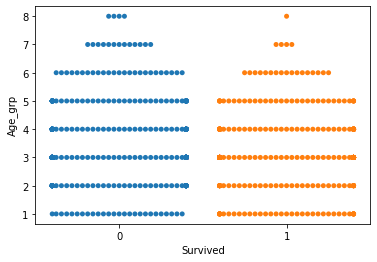

In [ ]:
#Plotting the relation between Age_grp and Survival chance
#plt.figure(figsize=(50,40))
sns.swarmplot(TR_Data['Survived'],TR_Data['Age_grp'])


Age group 3 and 4 ie. from 20 to 40 have larger survival chance

From Above visualisation , it is evident that the majority of the people who survived is from age group between 20 to 40. I believe Age group from 20 - 40 is considered as the most healthy period of a human life hence, while alloting seats in lifeboats , they would have considered this factor.

Lets now find the relation between Age , Sex and Pclass

In [ ]:
pd.crosstab([TR_Data.Sex, TR_Data.Survived], [TR_Data.Age_grp, TR_Data.Pclass], margins=True).style.background_gradient(cmap='autumn_r')


**Inference from Above graph:**

**Age group < 10**
All Male Children below age 10 who travelled in first and second class survived. 
Majority ie. 88% of the female children below 10 years in Class 1 and 2 also survived.

Out of 290 survivers , 153 were between age group 20 to 40 , that contribute to 53 % of total survivals

Out of 424 death , 270 people travelled in third class , and this contrubutes to 63 % of overall death.

Elders were not given preference irrespective of the gender or class as we can see  all elders 90 % elders who are between 70 and 80 years of age died.


**Relation between Embarked Station and Survival chance**

Lets find out if there were given any priorty for passengers who travelled with Sibling and Spouse

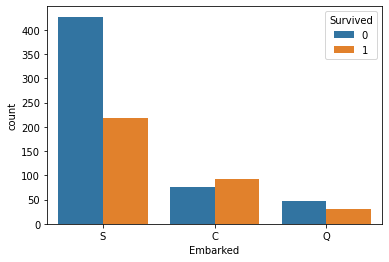

In [ ]:
#To find out relation between SibSp and Survival chance

sns.countplot('Embarked', hue='Survived', data=TR_Data)

From the graph , we can infer that the people who embarked from S port Survived compared to other ports

**Relation between SibSp and Parch**

Now lets find out if there were any priority given for the people who travelled as family compared to solo traveller .

For that Iam going to combine together the Sibling,Spouse and parent and children column.


In [ ]:
data = [TR_Data, TE_Data]
for i in data:
    i['Family_members'] = i['SibSp'] + i['Parch']
    i.loc[i['Family_members'] > 0, 'with_companion'] = 0
    i.loc[i['Family_members'] == 0, 'with_companion'] = 1
    i['with_companion'] = i['with_companion'].astype(int)
TR_Data['with_companion'].value_counts()

1    537
0    354
Name: with_companion, dtype: int64

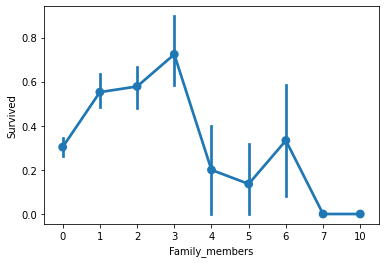

In [ ]:
#axes = sns.factorplot('Family_members','Survived', data=TR_Data, aspect = 2)
sns.pointplot('Family_members','Survived', data=TR_Data, aspect = 2)

From above graph we can see that the family who travelled with 3 members got better chance of survival than who travelled Single or with more than three family members.

In [ ]:
TR_Data.drop(['Age','Family_members','with_companion'], axis=1, inplace= True)

In [ ]:
TR_Data.shape

(891, 10)

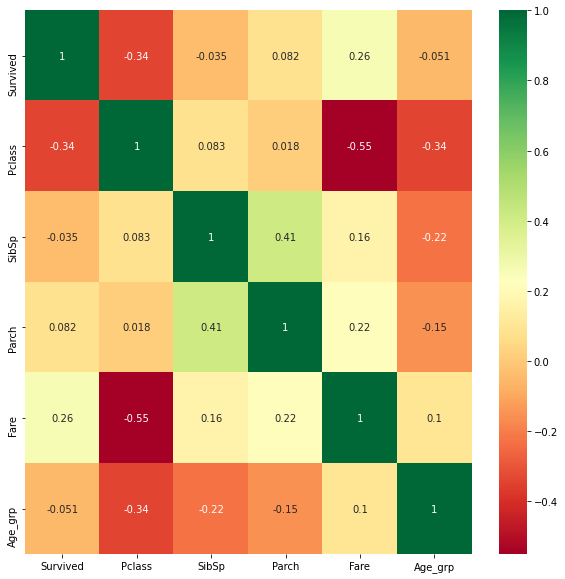

In [ ]:
plt.figure(figsize = (10, 10))
corr_mat = TR_Data.corr()
#sns.heatmap(corr_mat, xticklabels = corr_mat.columns, yticklabels = corr_mat.columns, annot=True, cmap="RdYlGn")
sns.heatmap(corr_mat, annot=True, cbar=True, cmap="RdYlGn")


As per this correlation metrics Age and fare has high corelation , hence we can eliminate fare column as fare will have almost similar impact as age .



## **EDA OUTCOMES**

EDA is completed and the Assumption which I made initially turn out to be true.

passengers who travelled with 1 to three passengers ,females, children under 10 yrs of age ,embarked from port S and travelled in First class had a better survival chance.

Insights: As per the general convention , Ladies , Children , Families who belongs to richer sections of society were given higher priority .

## **END OF EDA**

# **Models Creation**

Transforming catagorical variable to numbers using dummy function in pandas

In [ ]:
pd.get_dummies(TR_Data["Sex"])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


What we can do is to remove the first column because one column indicates the value of the other column.
For example, if the male is 1, then the female will be 0 and vice versa.



In [ ]:
sex = pd.get_dummies(TR_Data["Sex"],drop_first=True)

Let’s do the same for Embarked and PClass

In [ ]:
embarked = pd.get_dummies(TR_Data["Embarked"],drop_first=True)
#pclass = pd.get_dummies(TR_Data["Pclass"],drop_first=True)

We add these variables to the dataset:

In [ ]:
TR_Data = pd.concat([TR_Data,sex,embarked],axis=1)

Lets drop these column from dataset

In [ ]:
TR_Data.drop(["Name","Sex","Ticket","Embarked"],axis=1,inplace=True)

**Splitting the data**

In [ ]:
from sklearn.model_selection import train_test_split

#Loading the data set

y= TR_Data['Survived']
x=TR_Data.drop(['Survived'], axis=1)



In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [ ]:
print ('shape of x train :', x_train.shape)
print ('shape of y train :', y_train.shape)
print ('shape of x test :', x_test.shape)
print ('shape of x test :', y_test.shape)


shape of x train : (623, 8)
shape of y train : (623,)
shape of x test : (268, 8)
shape of x test : (268,)


**Feature Scaling**

In [ ]:
#Import Scaling
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.fit_transform(x_test)

Lets start building models

Iam going to build different models based on available algorithms an test the accuracy

# Logistic Regression 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
#Creating the model
Model_1=LogisticRegression()
# Fitting train data to model
Model_1.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#Testing data

prediction=Model_1.predict(x_test)
score=accuracy_score(prediction,y_test)
print(score)


0.8022388059701493


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       157
           1       0.80      0.70      0.75       111

    accuracy                           0.80       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



**We got 80% accuracy with Logistic Regression**

 Lets check the confusion metrics

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, prediction)

array([[137,  20],
       [ 33,  78]])

True positive: 136 (We predicted a positive result and it was positive)

True negative: 78 (We predicted a negative result and it was negative)

False positive: 21 (We predicted a positive result and it was negative)

False negative: 33 (We predicted a negative result and it was positive)

**Model Performance Evaluation - Logistic Regression**

Lets find out the Sensitivity,Specificity, Accuracy and F1 scores 

In [ ]:
     from sklearn.metrics import roc_auc_score,f1_score
     s= confusion_matrix(y_test,prediction)

    

In [ ]:
sensitivity_Reg = s[1,1]/(s[1,0]+s[1,1])
print("sensitivity_Reg :",sensitivity_Reg)
Specificity_Reg =  s[0,0]/(s[0,1]+s[0,0])
print("Specificity_Reg :", Specificity_Reg)
Precision_Reg = s[1,1]/(s[0,1]+s[1,1])
print("Precision_Reg:", Precision_Reg)
AUC_Reg = roc_auc_score(y_test, prediction)
print("AUC Score_Reg:", AUC_Reg)
F1_Reg = f1_score(y_test,prediction)
print("f1 score_Reg:" , F1_Reg)

sensitivity_Reg : 0.7027027027027027
Specificity_Reg : 0.8726114649681529
Precision_Reg: 0.7959183673469388
AUC Score_Reg: 0.7876570838354278
f1 score_Reg: 0.7464114832535885


Lets plot the RC Curve to visualize the model performance , the more the area under RC curve, indicates more accurate the model is  

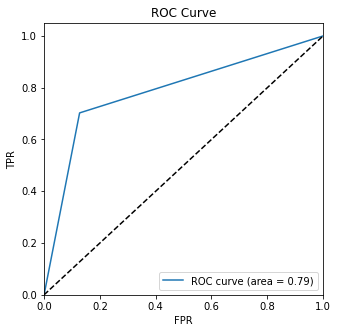

In [ ]:
    
    from sklearn import metrics
    fpr, tpr, thresholds = metrics.roc_curve( y_test,prediction,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( y_test, prediction )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

# Decision Tree Classifier




In [ ]:
from sklearn.tree import DecisionTreeClassifier

Decision_Model=DecisionTreeClassifier()

Decision_Model=Decision_Model.fit(x_train,y_train)



In [ ]:
Prediction_Decision=Decision_Model.predict(x_test)

In [ ]:
accuracy_Decision=accuracy_score(Prediction_Decision,y_test)
print(accuracy_Decision)

0.7761194029850746


In [ ]:
print(classification_report(y_test, Prediction_Decision))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       157
           1       0.77      0.65      0.71       111

    accuracy                           0.78       268
   macro avg       0.78      0.76      0.76       268
weighted avg       0.78      0.78      0.77       268



In [ ]:
confusion_matrix(y_test, Prediction_Decision)

array([[136,  21],
       [ 39,  72]])

**We got 76% accuracy in predition using Decision Tree Classifier algorithm**

**Model Evaluation - Decision Tree**

In [ ]:
D= confusion_matrix(y_test,Prediction_Decision)
Sensitivity_Decision = D[1,1]/(D[1,0]+D[1,1])
print("Sensitivity_Decision :",Sensitivity_Decision)
Specificity_Decision =  D[0,0]/(D[0,1]+D[0,0])
print("Specificity_Decision :", Specificity_Decision)
Precision_Decision = D[1,1]/(D[0,1]+D[1,1])
print("Precision_Decision:", Precision_Decision)
AUC_Decision = roc_auc_score(y_test, Prediction_Decision)
print("AUC Score_Decision:",AUC_Decision)
F1_Decision = f1_score(y_test,Prediction_Decision)
print("f1 score_Decision:" , F1_Decision)

Sensitivity_Decision : 0.6486486486486487
Specificity_Decision : 0.8662420382165605
Precision_Decision: 0.7741935483870968
AUC Score_Decision: 0.7574453434326046
f1 score_Decision: 0.7058823529411764


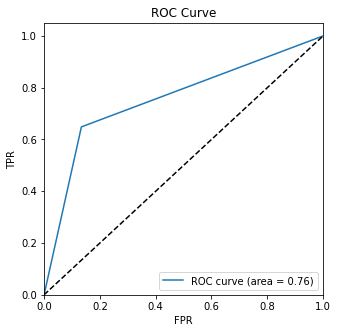

In [ ]:
    
    from sklearn import metrics
    fpr, tpr, thresholds = metrics.roc_curve( y_test,Prediction_Decision,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( y_test, Prediction_Decision )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
Random_Model=RandomForestClassifier()

In [ ]:
Randon_Model=Random_Model.fit(x_train,y_train)

In [ ]:
Prediction_Random=Random_Model.predict(x_test)

In [ ]:
accuracy_Random=accuracy_score(Prediction_Random,y_test)
print(accuracy_Random)

0.7761194029850746


In [ ]:
print(classification_report(y_test, Prediction_Random))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82       157
           1       0.78      0.64      0.70       111

    accuracy                           0.78       268
   macro avg       0.78      0.76      0.76       268
weighted avg       0.78      0.78      0.77       268



In [ ]:
confusion_matrix(y_test, Prediction_Random)

array([[137,  20],
       [ 40,  71]])

 **We got 78% accuracy with Random Forest algorithm**

**Model Evaluation - Random Forest**

In [ ]:
R= confusion_matrix(y_test,Prediction_Random)
Sensitivity_Random = R[1,1]/(R[1,0]+R[1,1])
print("Sensitivity_Random :",Sensitivity_Random)
Specificity_Random =  R[0,0]/(R[0,1]+R[0,0])
print("Specificity_Random :", Specificity_Random)
Precision_Random = R[1,1]/(R[0,1]+R[1,1])
print("Precision_Random:", Precision_Random)
AUC_Random = roc_auc_score(y_test, Prediction_Random)
print("AUC Score_Random:",AUC_Random )
F1_Random = f1_score(y_test,Prediction_Random)
print("f1 score_Random:" ,F1_Random )

Sensitivity_Random : 0.6396396396396397
Specificity_Random : 0.8726114649681529
Precision_Random: 0.7802197802197802
AUC Score_Random: 0.7561255523038963
f1 score_Random: 0.702970297029703


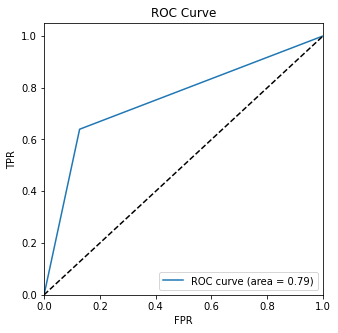

In [ ]:
#ROC curve for Random Fores
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve( y_test,Prediction_Random,
                                             drop_intermediate = False )
auc_score = metrics.roc_auc_score( y_test, prediction )
plt.figure(figsize=(5, 5))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Support Vector Machine

In [ ]:
from sklearn import svm
from sklearn.svm import SVC

In [ ]:
svm_Model=SVC()

In [ ]:
svm_Model=svm_Model.fit(x_train,y_train)

In [ ]:
Prediction_svm=svm_Model.predict(x_test)

In [ ]:
accuracy_svm=accuracy_score(Prediction_svm,y_test)
print(accuracy_svm)

0.8059701492537313


In [ ]:
print(classification_report(y_test, Prediction_svm))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85       157
           1       0.86      0.63      0.73       111

    accuracy                           0.81       268
   macro avg       0.82      0.78      0.79       268
weighted avg       0.82      0.81      0.80       268



In [ ]:
confusion_matrix(y_test, Prediction_svm)

array([[146,  11],
       [ 41,  70]])

**We got 66% accuracy using SVM algorithm**

**Model Evaluation - SVM**

In [ ]:
SVM= confusion_matrix(y_test,Prediction_svm)
Sensitivity_svm = SVM[1,1]/(SVM[1,0]+SVM[1,1])
print("Sensitivity_svm :",Sensitivity_svm)
Specificity_svm =  SVM[0,0]/(SVM[0,1]+SVM[0,0])
print("Specificity_svm :", Specificity_svm)
Precision_svm = SVM[1,1]/(SVM[0,1]+SVM[1,1])
print("Precision_svm:", Precision_svm)
AUC_svm = roc_auc_score(y_test, Prediction_svm)
print("AUC Score_svm:", AUC_svm)
F1_svm = f1_score(y_test,Prediction_svm)
print("f1 score_svm:" , F1_svm)
            

Sensitivity_svm : 0.6306306306306306
Specificity_svm : 0.9299363057324841
Precision_svm: 0.8641975308641975
AUC Score_svm: 0.7802834681815574
f1 score_svm: 0.7291666666666666


# Naive Bayes(Gaussian)

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
Bayes_Model=GaussianNB()

In [ ]:
Bayes_Model=Bayes_Model.fit(x_train,y_train)

In [ ]:
Prediction_Bayes=Bayes_Model.predict(x_test)

In [ ]:
accuracy_Bayes=accuracy_score(Prediction_Bayes,y_test)
print(accuracy_Bayes)

0.7947761194029851


In [ ]:
print(classification_report(y_test, Prediction_Bayes))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       157
           1       0.77      0.72      0.74       111

    accuracy                           0.79       268
   macro avg       0.79      0.78      0.79       268
weighted avg       0.79      0.79      0.79       268



In [ ]:
confusion_matrix(y_test, Prediction_Bayes)

array([[133,  24],
       [ 31,  80]])

**We got 78% accuracy using Naive Bayes Algorithm**

**Model Evaluation - Naive bayes(Gaussian)**

In [ ]:
B= confusion_matrix(y_test,Prediction_Bayes)
Sensitivity_Bayes = B[1,1]/(B[1,0]+B[1,1])
print("Sensitivity_Bayes :",Sensitivity_Bayes)
Specificity_Bayes =  B[0,0]/(B[0,1]+B[0,0])
print("Specificity_Bayes :", Specificity_Bayes)
Precision_Bayes = B[1,1]/(B[0,1]+B[1,1])
print("Precision_Bayes:", Precision_Bayes)
AUC_Bayes = roc_auc_score(y_test, Prediction_Bayes)
print("AUC Score_Bayes:", AUC_Bayes)
F1_Bayes =  f1_score(y_test,Prediction_Bayes)
print("f1 score_Bayes:" ,F1_Bayes)

Sensitivity_Bayes : 0.7207207207207207
Specificity_Bayes : 0.8471337579617835
Precision_Bayes: 0.7692307692307693
AUC Score_Bayes: 0.7839272393412522
f1 score_Bayes: 0.7441860465116278


# Comparison of Models 

In [ ]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','Decision Tree','Random Forest','SVM', 'Naive Bayes'],
    'Accuracy': [score, accuracy_Decision, accuracy_Random, accuracy_svm, accuracy_Bayes],
    'Sensitivity': [sensitivity_Reg, Sensitivity_Decision, Sensitivity_Random, Sensitivity_svm, Sensitivity_Bayes],
    'Specificity':[Specificity_Reg, Specificity_Decision, Specificity_Random, Specificity_svm, Specificity_Bayes],
    'Precision': [Precision_Reg, Precision_Decision, Precision_Random, Precision_svm, Precision_Bayes],
    'AUC': [AUC_Reg, AUC_Decision, AUC_Random, AUC_svm, AUC_Bayes],
    'F1 score': [F1_Reg, F1_Decision, F1_Random, F1_svm, F1_Bayes]}) 
result = results.sort_values(by='Accuracy', ascending=False)
#result = result.set_index('Accuracy')
#cm = sns.light_palette("green", as_cmap=True)
result.head(5).style.background_gradient(cmap='Blues')

,Model,Accuracy,Sensitivity,Specificity,Precision,AUC,F1 score
3,SVM,0.805970,0.630631,0.929936,0.864198,0.780283,0.729167
0,Logistic Regression,0.802239,0.702703,0.872611,0.795918,0.787657,0.746411
4,Naive Bayes,0.794776,0.720721,0.847134,0.769231,0.783927,0.744186
1,Decision Tree,0.776119,0.648649,0.866242,0.774194,0.757445,0.705882
2,Random Forest,0.776119,0.639640,0.872611,0.780220,0.756126,0.702970


**Out of all these algoritms, SVM model and Logistic regression  has maximum accuracy of 80 %**

# **Hyperparameter Tuning**

We are going to tune the hyperparameters on SVM , Logistic regression and Random Forest

**Implementing Grid CV on Logistic Regression (Tuning)**

In [ ]:
Parameter_dict = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [3000,5000,10000 ]
    }
]

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
log_grid = GridSearchCV(Model_1, param_grid= Parameter_dict, cv = 3, verbose=True, n_jobs=-1)

In [ ]:
log_after_grid = log_grid.fit(x_train,y_train)

Fitting 3 folds for each of 1200 candidates, totalling 3600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 522 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 3600 out of 3600 | elapsed:   11.3s finished


In [ ]:
log_after_grid.best_estimator_

LogisticRegression(C=0.615848211066026, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=3000, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
log_pred=log_after_grid.best_estimator_.predict(x_test)

In [ ]:
# printing confusion matrix after applying Randon CV
print(confusion_matrix(y_test,log_pred))

[[137  20]
 [ 33  78]]


In [ ]:
# printing confusion matrix we got before random CV 
confusion_matrix(y_test, prediction)

array([[137,  20],
       [ 33,  78]])

In [ ]:
# Printing classification after Random CV

print(classification_report(y_test, log_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       157
           1       0.80      0.70      0.75       111

    accuracy                           0.80       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



No big improvement 

**Tuning SVM using Grid CV**

In [ ]:
svm_grid = {'C': [0.25, 0.35, 0.50, 0.1],  
                     'gamma': [0.0025, 0.0050, 0.0075], 
                     'kernel': ['rbf']}

In [ ]:
svm_grid_model = GridSearchCV(svm_Model, param_grid= svm_grid, cv = 3, verbose=True, n_jobs=-1)

In [ ]:
svm_grid_model.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.4s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.25, 0.35, 0.5, 0.1],
                         'gamma': [0.0025, 0.005, 0.0075], 'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=True)

In [ ]:
svm_grid_model.best_estimator_

SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0075, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
svm_after_grid= svm_grid_model.best_estimator_.predict(x_test)

In [ ]:
print(confusion_matrix(y_test,svm_after_grid))

[[134  23]
 [ 33  78]]


In [ ]:
print(classification_report(y_test, svm_after_grid))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       157
           1       0.77      0.70      0.74       111

    accuracy                           0.79       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268



In [ ]:
print(classification_report(y_test,Prediction_svm))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85       157
           1       0.86      0.63      0.73       111

    accuracy                           0.81       268
   macro avg       0.82      0.78      0.79       268
weighted avg       0.82      0.81      0.80       268



In [ ]:
#comparing confusion matrix with model tuning
confusion_matrix(y_test, Prediction_svm)

array([[146,  11],
       [ 41,  70]])

**Accuracy increased from 80 to 82 %**

**Tuning Random Forest Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
param_dict = [    
    {'n_estimators': [10],
    'max_depth': [125, 130],
    'min_samples_split': [80, 90, 70],
    'min_samples_leaf': [30,20,10],
    'bootstrap': [True, False]
    }
]

In [ ]:
Randomforest_model_grid = GridSearchCV(Random_Model, param_grid= param_dict, cv = 5, verbose=True, n_jobs=-1)

In [ ]:
Randomforest_model_grid.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    2.7s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
Randomforest_model_grid.best_estimator_

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=125, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=80,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_after_grid=Randomforest_model_grid.best_estimator_.predict(x_test)

In [ ]:
print(confusion_matrix(y_test,y_after_grid))

[[145  12]
 [ 40  71]]


In [ ]:
# Confusion matrix before tuning
confusion_matrix(y_test, Prediction_Random)

array([[137,  20],
       [ 40,  71]])

In [ ]:
print(classification_report(y_test,y_after_grid))

              precision    recall  f1-score   support

           0       0.78      0.92      0.85       157
           1       0.86      0.64      0.73       111

    accuracy                           0.81       268
   macro avg       0.82      0.78      0.79       268
weighted avg       0.81      0.81      0.80       268



In [ ]:
# For comparing with old matrix
print(classification_report(y_test,Prediction_Random))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82       157
           1       0.78      0.64      0.70       111

    accuracy                           0.78       268
   macro avg       0.78      0.76      0.76       268
weighted avg       0.78      0.78      0.77       268



After tuning parameters in three models ie, Logistic regression,SVM and Random forest , we found the accuracy increased in SVM .

After Hyperparameter tuning SVM is giving best results with 82 % Accuracy

# **We can finilize the best model for this problem is SVM with 82 % accuracy , 81 % precision and 81 % recall**